# SC1015 Mini Project

Problem Formulation: *probably need to include a brief summary of project here *

Dataset Used: [Sleep Health and Lifestyle Dataset from Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data)

---
## Table of Contents
1. [Data Preparation and Cleaning](#dataprep)
2. [Exploratory Data Analysis](#EDA)

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

from sklearn.preprocessing import OneHotEncoder

In [2]:
# Import dataset
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
sleep_data = pd.DataFrame(data)

---
## Data Preparation and Cleaning <a name="dataprep"></a>

### 1. Dataset Overview

In [3]:
sleep_data.head(n = 5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
sleep_data.shape

(374, 13)

In [5]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [18]:
# Check for NA and missing values 
has_na = sleep_data.isna().any().any()
if has_na:
    print("The dataframe contains NA values.")
else:
    print("The dataframe does not contain NA values.")

The dataframe does not contain NA values.


### 2. Data Cleaning

In [7]:
# Removing irrelevant columns
sleep_data = sleep_data.drop('Person ID', axis = 1)
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


### 3. Data Preparation
In our project, we will be working with two dataframes.
1. **sleep_data** : Contains original data to conduct Exploratory Data Analysis
2. **data_ohe** : Contains the one hot encoding format for the original dataframe (sleep_data). The purpose of this is to convert categorical variables into a numerical format so that out machine learning algorithm (Random Forest Algorithm) can understand and process it.
---
This section focuses on preparing data_ohe dataframe.

In [8]:
# Change the categories under Sleep Disorder into numerical format
temp_df = sleep_data.copy()
temp_df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [9]:
temp_df['Sleep Disorder'] = np.where(temp_df['Sleep Disorder'] == 'None', 0,
np.where(temp_df['Sleep Disorder'] == 'Sleep Apnea', 1,
np.where(temp_df['Sleep Disorder'] == 'Insomnia', 2, -1)))


In [10]:
temp_df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1


In [11]:
temp_df.info()
# Sleep Disorder is now an integer column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    int32  
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 33.7+ KB


In [12]:
# One hot encoding of remaining categorical variables (Gender, Occupation, BMI category, Blood Pressure)
ohe = OneHotEncoder()

# Store categorical columns into temporary dataframe and fit ohe model
cat= temp_df[['Gender','Occupation','BMI Category','Blood Pressure']]
ohe.fit(cat)

# Store ohe transformation into new dataframe cat_ohe
cat_ohe = pd.DataFrame(ohe.transform(cat).toarray(), columns=ohe.get_feature_names_out(cat.columns))
cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender_Female                    374 non-null    float64
 1   Gender_Male                      374 non-null    float64
 2   Occupation_Accountant            374 non-null    float64
 3   Occupation_Doctor                374 non-null    float64
 4   Occupation_Engineer              374 non-null    float64
 5   Occupation_Lawyer                374 non-null    float64
 6   Occupation_Manager               374 non-null    float64
 7   Occupation_Nurse                 374 non-null    float64
 8   Occupation_Sales Representative  374 non-null    float64
 9   Occupation_Salesperson           374 non-null    float64
 10  Occupation_Scientist             374 non-null    float64
 11  Occupation_Software Engineer     374 non-null    float64
 12  Occupation_Teacher    

In [13]:
# Combining Numeric features with the OHE Categorical features
num = temp_df[['Age', 'Sleep Duration','Quality of Sleep','Physical Activity Level','Heart Rate', 'Daily Steps','Stress Level']]
res = temp_df['Sleep Disorder']
data_ohe = pd.concat([num, cat_ohe,res], sort = False, axis = 1).reindex(index=num.index)

# Check the final dataframe
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              374 non-null    int64  
 1   Sleep Duration                   374 non-null    float64
 2   Quality of Sleep                 374 non-null    int64  
 3   Physical Activity Level          374 non-null    int64  
 4   Heart Rate                       374 non-null    int64  
 5   Daily Steps                      374 non-null    int64  
 6   Stress Level                     374 non-null    int64  
 7   Gender_Female                    374 non-null    float64
 8   Gender_Male                      374 non-null    float64
 9   Occupation_Accountant            374 non-null    float64
 10  Occupation_Doctor                374 non-null    float64
 11  Occupation_Engineer              374 non-null    float64
 12  Occupation_Lawyer     

In [14]:
data_ohe.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps,Stress Level,Gender_Female,Gender_Male,Occupation_Accountant,...,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder
0,27,6.1,6,42,77,4200,6,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,28,6.2,6,60,75,10000,8,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,28,6.2,6,60,75,10000,8,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,28,5.9,4,30,85,3000,8,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,28,5.9,4,30,85,3000,8,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


---
## Exploratory Data Analysis <a name="EDA"></a>

In [15]:
sleep_data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### 1. Univariate Analysis
Analyse each variable individually to understand its distribution and characteristics

### 2. Multivariate Analysis
Explore relationships between variables and Sleep Disorder

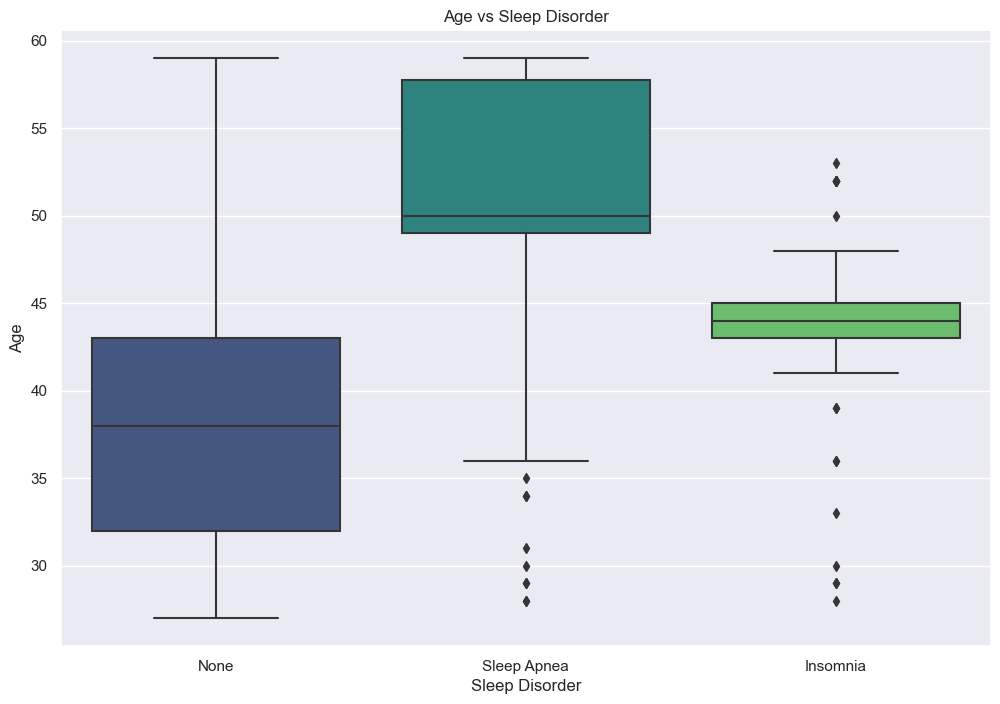

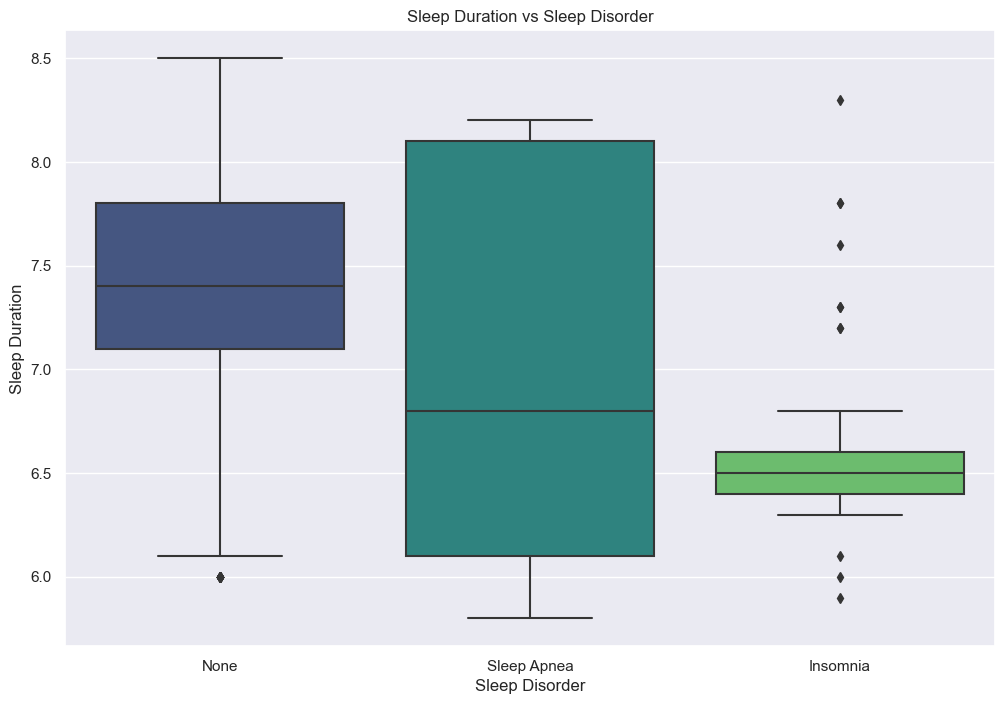

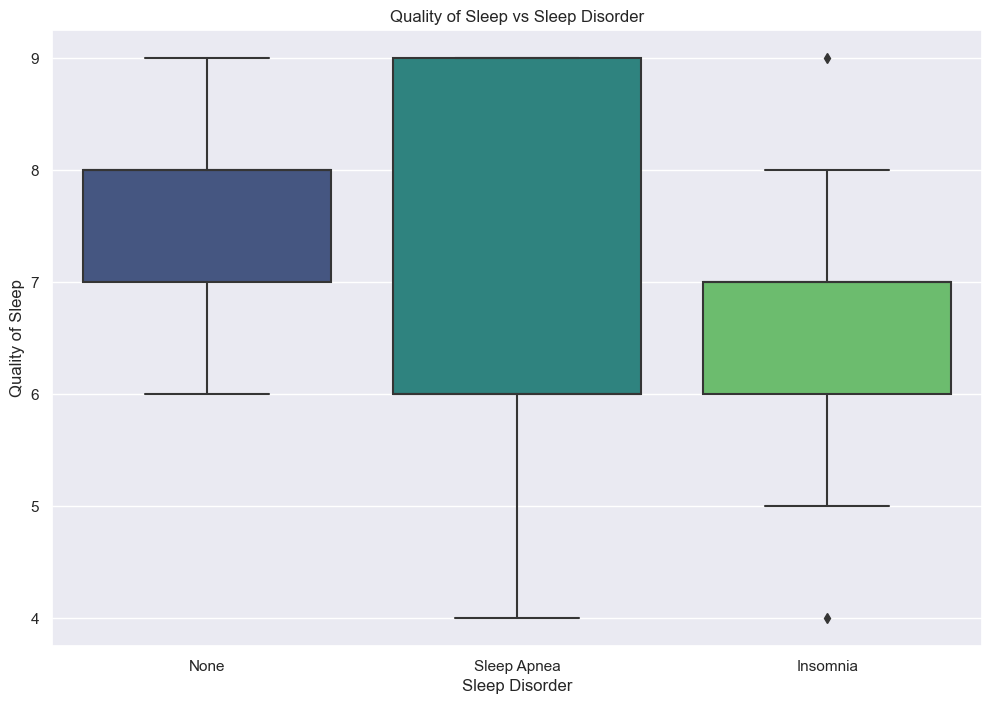

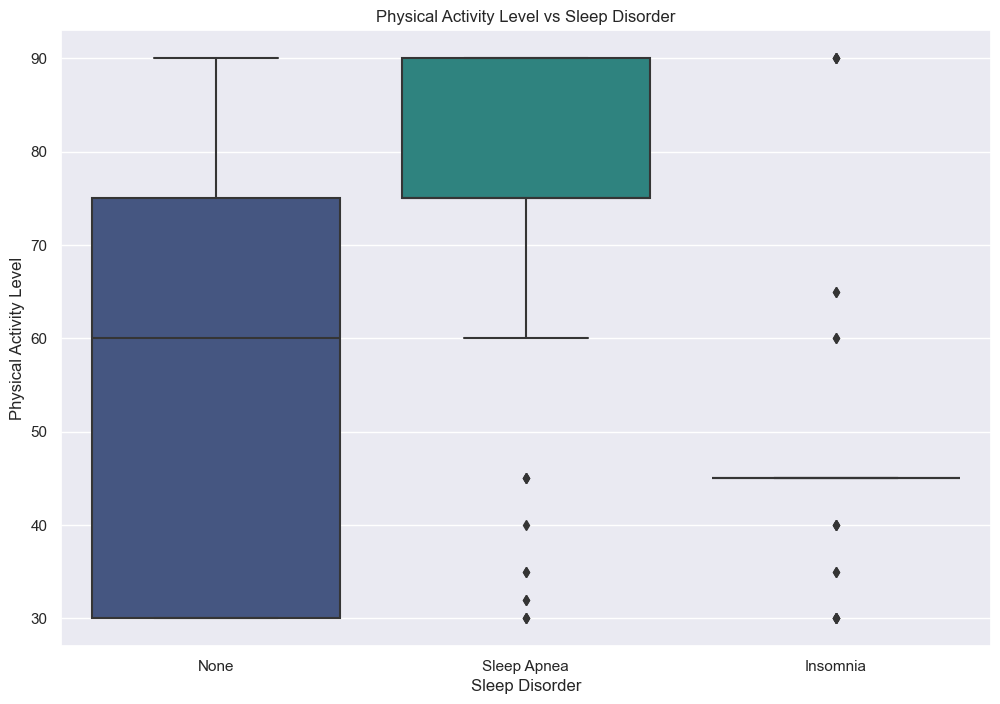

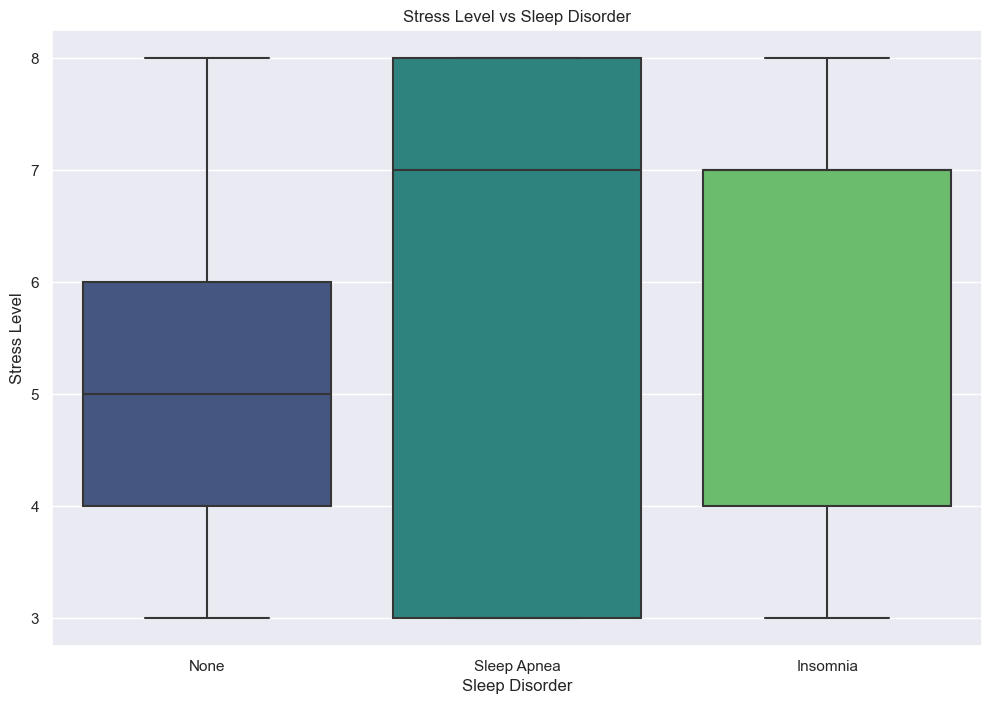

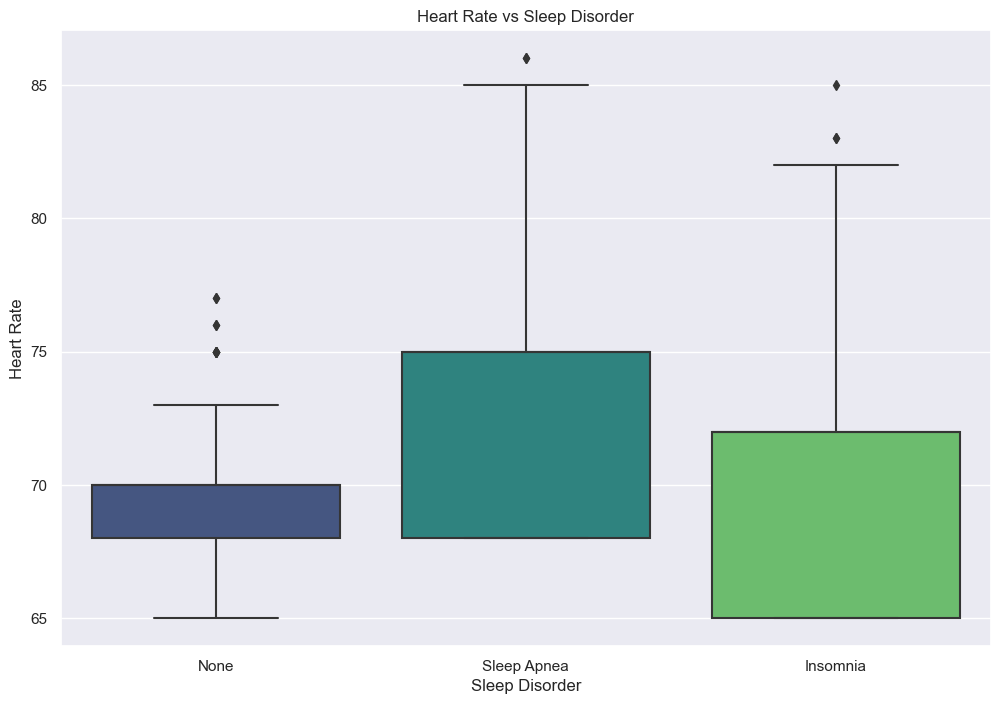

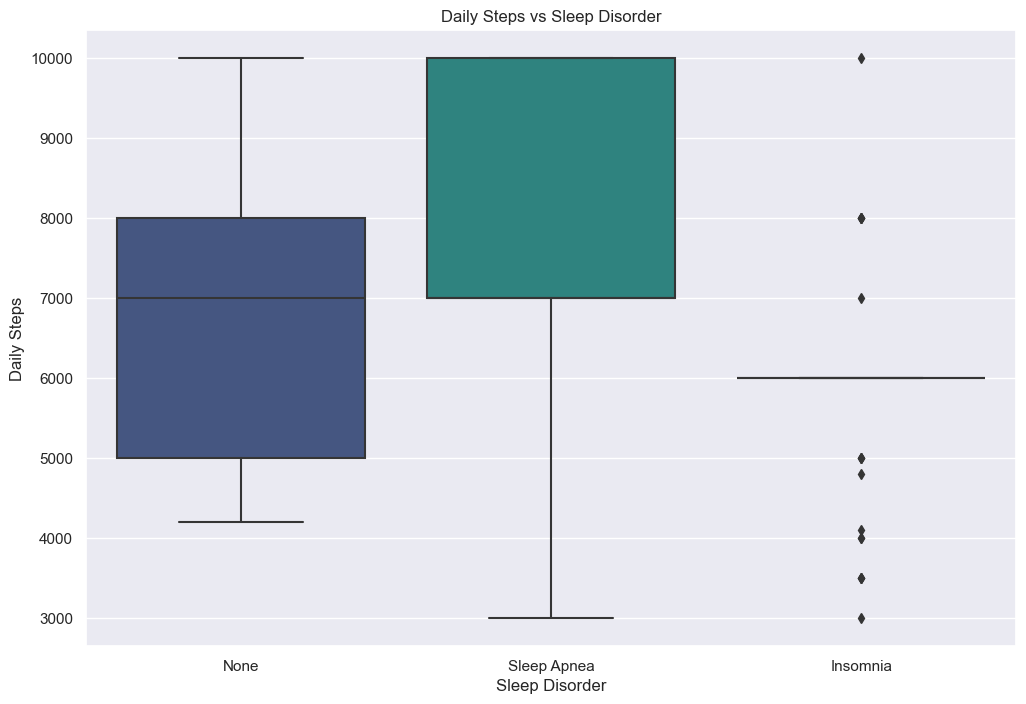

In [22]:
# Boxplot for numerical variables vs sleep disorder (categorical)
numerical_vars = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

for var in numerical_vars:
    plt.figure(figsize=(12,8))
    sb.boxplot(x=sleep_data['Sleep Disorder'], y=sleep_data[var], palette='viridis')
    plt.title(f'{var} vs Sleep Disorder')
    plt.show()

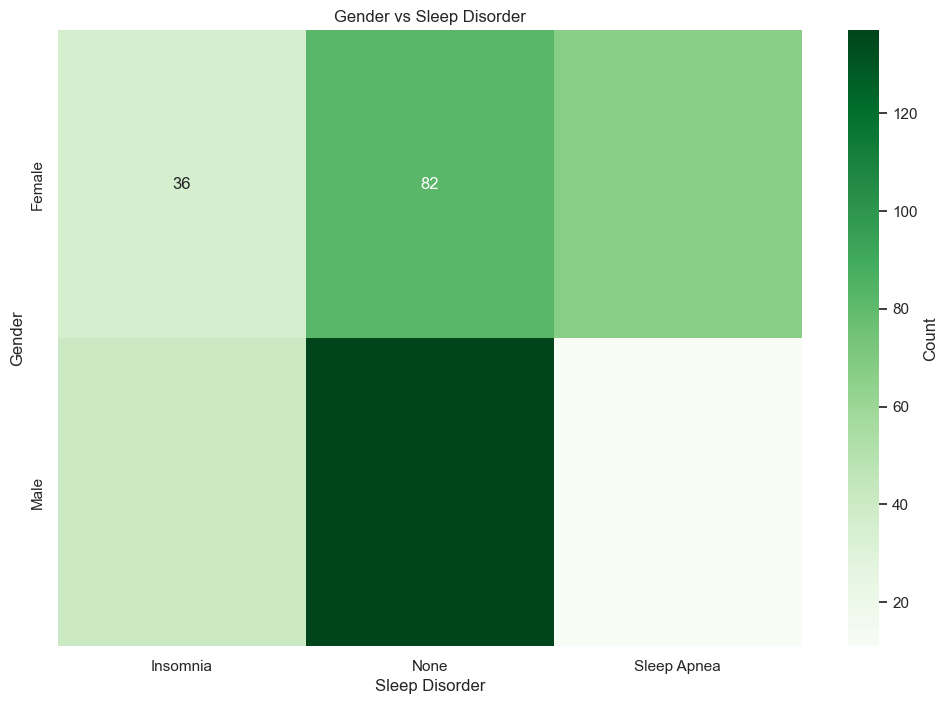

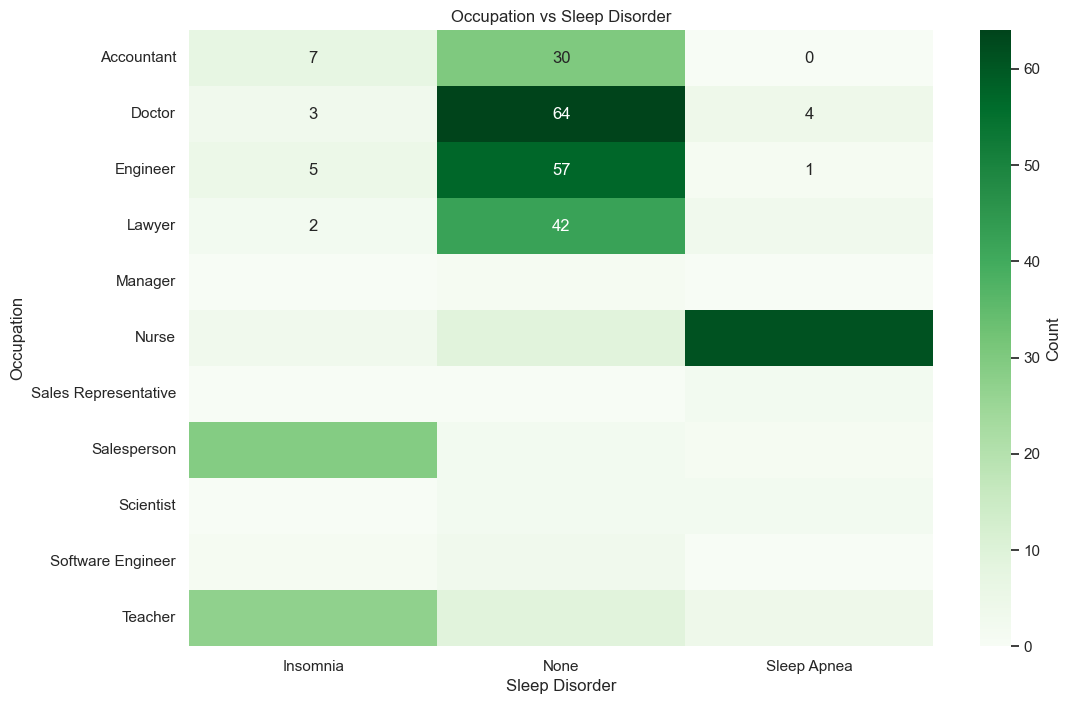

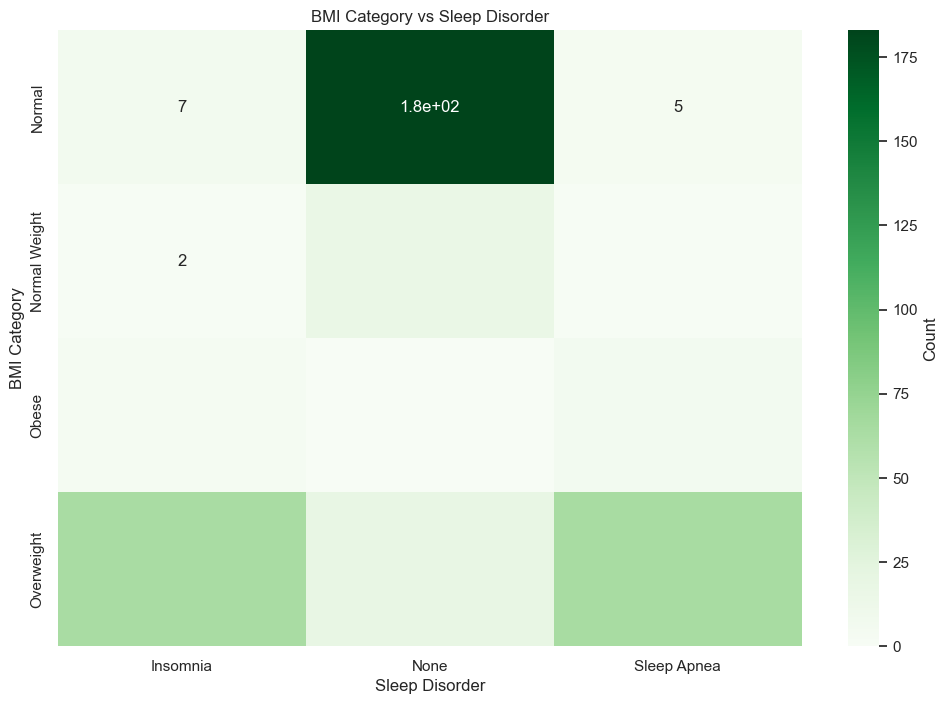

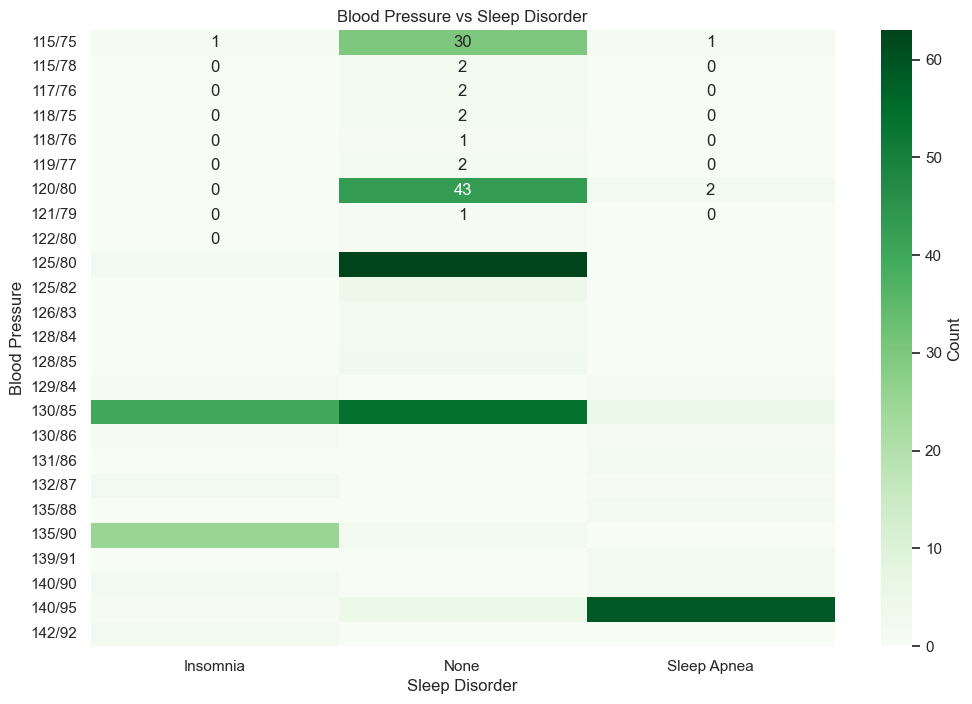

In [26]:
categorical_vars = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']

for var in categorical_vars:
    plt.figure(figsize=(12,8))
    cross_tab = pd.crosstab(sleep_data[var], sleep_data['Sleep Disorder'])
    sb.heatmap(cross_tab, annot=True, cmap='Greens', cbar_kws={'label': 'Count'})
    plt.title(f'{var} vs Sleep Disorder')
    plt.show()